In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [6]:
def import_pics(base_path):
    all_pics = list()
    all_labels = list()
    for species in os.listdir(base_path):
        for tmp_pic in os.listdir(base_path+species):
            all_labels.append(species)
            all_pics.append(np.array(Image.open(base_path+species+"/"+tmp_pic)))
    return np.array(all_pics), np.array(all_labels)

In [7]:
base_path = r'data/200_species_train/'
X_train, y_train = import_pics(base_path)

### EDA

In [8]:
print(X_train.shape)
print(y_train.shape)

(27503, 224, 224, 3)
(27503,)


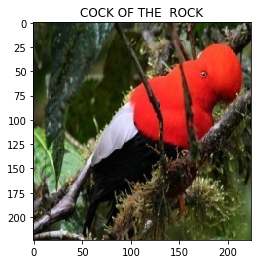

In [13]:
#example for a pic
plt.imshow(X_train[3])
plt.title(y_train[3]);

In [14]:
m, p1, p2 ,rgb = X_train.shape

X_train_flatten = X_train.reshape((m, p1*p2*rgb))

In [15]:
X_train_flatten.shape

(27503, 150528)

Taking a sample of 20 species of birds

In [16]:
labels_20 = list(np.unique(y_train)[:20])
index_five = np.where([pd.Series(y_train).str.\
                     contains('|'.join(labels_20), regex=True)])[-1]

data_20 = X_train_flatten[index_five]

In [ ]:
#data = X_train_flatten[np.random.randint(X_train_flatten.shape[0], size=1000), :]

#### Dimensionality reduction:

ISOMAP

In [17]:
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=5, n_components=2)

iso.fit(data_20)

Isomap(eigen_solver='auto', max_iter=None, metric='minkowski',
       metric_params=None, n_components=2, n_jobs=None, n_neighbors=5,
       neighbors_algorithm='auto', p=2, path_method='auto', tol=0)

In [20]:
manifold_2Da = iso.transform(data_20)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])
manifold_2D.head()

,Component 1,Component 2
0,-12411.275236,-17683.421241
1,-27096.760297,6117.474462
2,19344.200758,9630.843995
3,-2582.857715,18739.190515
4,-22638.338625,-8414.656721


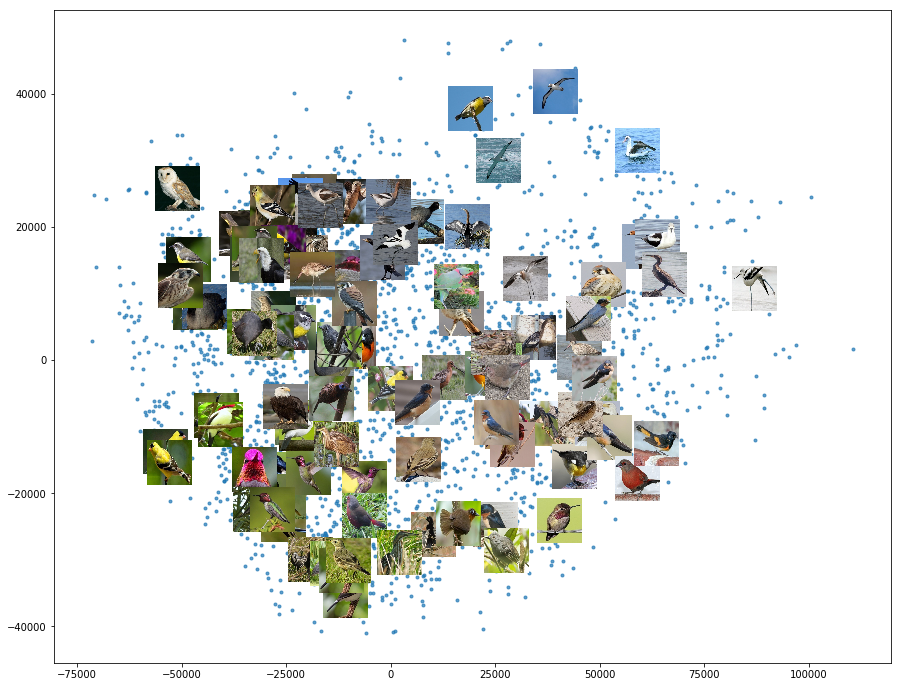

In [22]:
#plot of the two componenets

fig = plt.figure(figsize=(12,12))
fig.set_size_inches(15, 12)
ax = fig.add_subplot(111)
# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

for _ in range(100):
    random_index = np.random.randint(data_20.shape[0])
    array_to_img = data_20[random_index].reshape(p1, p2, rgb)
    ab = AnnotationBbox(OffsetImage(array_to_img, zoom=0.2), (manifold_2D['Component 1'][random_index], 
                                                    manifold_2D['Component 2'][random_index]),
                                                    frameon=False)
    ax.add_artist(ab)
    


#### t-SNE

In [23]:
from sklearn.manifold import TSNE

In [25]:
embedded_20 = TSNE(n_components=2).fit_transform(data_20)

embedded_df = pd.DataFrame(embedded_20, columns=['Component 1', 'Component 2'])

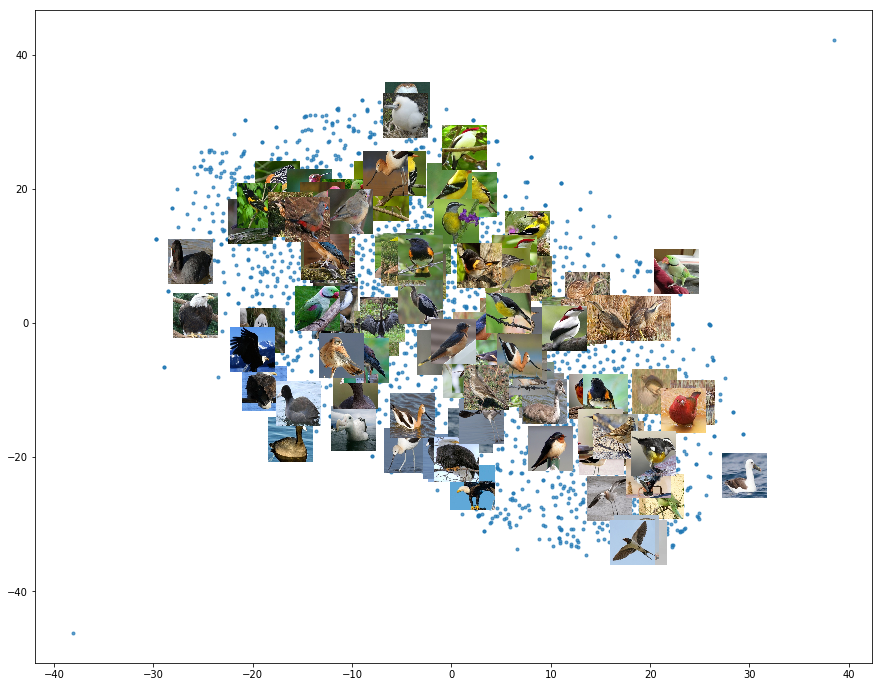

In [28]:
#plot of the components

fig = plt.figure(figsize=(12,12))
fig.set_size_inches(15, 12)
ax = fig.add_subplot(111)
# Show 2D components plot
ax.scatter(embedded_df['Component 1'], embedded_df['Component 2'], marker='.',alpha=0.7)

for _ in range(100):
    random_index = np.random.randint(data_20.shape[0])
    array_to_img = data_20[random_index].reshape(p1, p2, rgb)
    ab = AnnotationBbox(OffsetImage(array_to_img, zoom=0.2), (embedded_df['Component 1'][random_index], 
                                                    embedded_df['Component 2'][random_index]),
                                                    frameon=False)
    ax.add_artist(ab)
    